Lambda School Data Science

*Unit 4, Sprint 1, Module 3*

---

# Document Classification (Assignment)

This notebook is for you to practice skills during lecture.

Today's guided module project and assignment will be different. You already know how to do classification. You ready know how to extract features from documents. So? That means you're ready to combine and practice those skills in a kaggle competition. We we will open with a five minute sprint explaining the competition, and then give you 25 minutes to work. After those twenty five minutes are up, I will give a 5-minute demo an NLP technique that will help you with document classification (*and **maybe** the competition*).

Today's all about having fun and practicing your skills.

## Sections
* <a href="#p1">Part 1</a>: Text Feature Extraction & Classification Pipelines
* <a href="#p2">Part 2</a>: Latent Semantic Indexing
* <a href="#p3">Part 3</a>: Word Embeddings with Spacy
* <a href="#p4">Part 4</a>: Post Lecture Assignment

# Text Feature Extraction & Classification Pipelines (Learn)
<a id="p1"></a>

## Follow Along 

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model (try using the pipe method I just demoed)

### Load Competition Data

In [1]:
import pandas as pd

# You may need to change the path
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [2]:
train.head()

,id,description,ratingCategory
0,1321,"\nSometimes, when whisky is batched, a few lef...",1
1,3861,\nAn uncommon exclusive bottling of a 6 year o...,0
2,655,\nThis release is a port version of Amrut’s In...,1
3,555,\nThis 41 year old single cask was aged in a s...,1
4,1965,"\nQuite herbal on the nose, with aromas of dri...",1


In [3]:
print(f"Train Samples: {len(train)}")
print(f"Test Samples: {len(test)}")

Train Samples: 4087
Test Samples: 1022


**Baseline Scores**

In [4]:
from explore_data import get_num_words_per_sample 
from explore_data import plot_sample_length_distribution
from explore_data import plot_class_distribution
from explore_data import plot_frequency_distribution_of_ngrams
import seaborn as sns
sns.set()

In [5]:
median_words_per_sample = get_num_words_per_sample(train.description)
print(f"Median words per sample: {median_words_per_sample}")

Median words per sample: 70.0


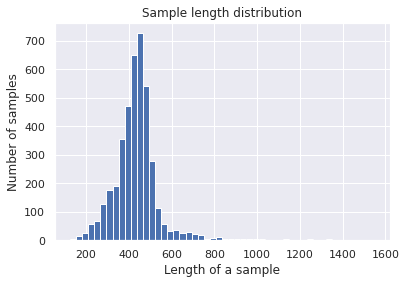

In [6]:
plot_sample_length_distribution(train.description)

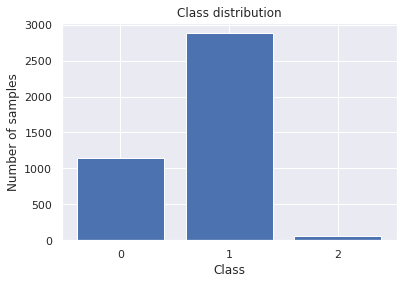

In [7]:
plot_class_distribution(train.ratingCategory)

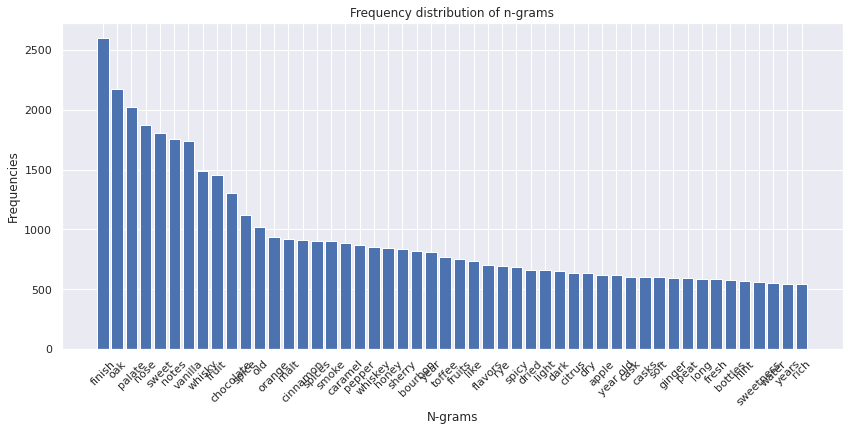

In [8]:
plot_frequency_distribution_of_ngrams(train.description,
                                      ngram_range=(1, 2),
                                      num_ngrams=50)

In [9]:
sw_ratio = len(train.description) / median_words_per_sample
print(f"Number of Samples / Median Words per Sample ratio: {int(sw_ratio)}")

Number of Samples / Median Words per Sample ratio: 58


### Define Pipeline Components

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

# Create Pipeline Components
vect = TfidfVectorizer(stop_words="english", 
                       ngram_range=(1,2),
                       min_df=2,
                       max_df=0.25)
svm = LinearSVC()
clf = svm

pipe = Pipeline([("vect", vect), ("clf", clf)])

In [14]:
# Get sparse dtm
dtm = vect.fit_transform(train.description)

# Convert to dataframe
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
print(dtm.shape)
dtm.head()

(4087, 26187)


,000,000 700,000 bottles,000 cases,020,020 bottles,060,060 bottles,080,080 bottles,...,zippy,zippy bright,zone,zuidam,zuidam distillers,zuidam distillery,ànima,ànima negra,ìle,ìle 2016
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [15]:
# Base Pipeline Build

pipe = Pipeline([
    ("vect", vect),
    ("clf", svm)
])

# Parameters for GridSearchCV

parameters = {
    "vect__max_df": (0.3, 0.5),
    "vect__min_df": (2, 5, 10),
    "vect__max_features": (5000, 20000),
    "clf__penalty": ("l1", "l2"),
    "clf__C": (0.1, 0.5, 1., 2.)
}

# GridSearchCV

grid_search = GridSearchCV(pipe, parameters, cv=5, n_jobs=-1, verbose=10)
grid_search.fit(train.description, train.ratingCategory)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


/home/cwhyse/miniconda3/envs/U4-S1-NLP/lib/python3.9/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.73991256 0.74064665 0.74260114 0.73232561 0.74015616 0.74260114
 0.74040185 0.74064635 0.74137775 0.7335487  0.73844437 0.74137775
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.74309044 0.74504942 0.73281251 0.75654565 0.7489641  0.73281251
 0.74431473 0.74529362 0.7342831  0.75752544 0.75067709 0.7342831
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.7355041  0.73672719 0.72278058 0.75165598 0.74137775 0.72278058
 0.7345255  0.73648359 0.72082369 0.75067679 0.74113295 0.72082369
        nan        nan        

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(max_df=0.25, min_df=2,
                                                        ngram_range=(1, 2),
                                                        stop_words='english')),
                                       ('clf', LinearSVC())]),
             n_jobs=-1,
             param_grid={'clf__C': (0.1, 0.5, 1.0, 2.0),
                         'clf__penalty': ('l1', 'l2'),
                         'vect__max_df': (0.3, 0.5),
                         'vect__max_features': (5000, 20000),
                         'vect__min_df': (2, 5, 10)},
             verbose=10)

### Make a Submission File
*Note:* In a typical Kaggle competition, you are only allowed two submissions a day, so you only submit if you feel you cannot achieve higher test accuracy. For this competition the max daily submissions are capped at **20**. Submit for each demo and for your assignment. 

In [16]:
# Predictions on test sample
pred = grid_search.predict(test['description'])

In [17]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [18]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [19]:
subNumber = 0

In [20]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

You're trying to achieve a minimum of 80% Accuracy on your model.

## Latent Semantic Indexing (Learn)
<a id="p2"></a>

## Follow Along
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
4. Make a submission to Kaggle 


### Define Pipeline Components

In [ ]:
lsi = ...
vect = ...
clf = ...

pipe = Pipeline([('lsi', lsi), ('clf', clf)])

### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [ ]:
parameters = {
    'lsi__svd__n_components': [10,100,250],
    'lsi__vect__max_df': (0.75, 1.0),
    'clf__max_depth':(5,10,15,20)
}

grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=4, verbose=1)
grid_search.fit(..., ...)

### Make a Submission File

In [ ]:
# Predictions on test sample
pred = grid_search.predict(test['description'])

In [ ]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [ ]:
# Make Sure the Category is an Integer
submission.head()

In [ ]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

Continue to apply Latent Semantic Indexing (LSI) to various datasets. 

# Word Embeddings with Spacy (Learn)
<a id="p3"></a>

## Follow Along

In [1]:
# Apply to your Dataset

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from scipy.stats import randint

param_dist = {
    
    'max_depth' : randint(3,10),
    'min_samples_leaf': randint(2,15)
}

In [ ]:
# Continue Word Embedding Work Here


### Make a Submission File

In [ ]:
# Predictions on test sample
pred = ...predict(test['description'])

In [ ]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [ ]:
# Make Sure the Category is an Integer
submission.head()

In [ ]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
    - Try to extract word embeddings with Spacy and use those embeddings as your features for a classification model.
4. Make a submission to Kaggle 

# Post Lecture Assignment
<a id="p4"></a>

Your primary assignment this afternoon is to achieve a minimum of 80% accuracy on the Kaggle competition. Once you have achieved 70% accuracy, please work on the following: 

1. Research "Sentiment Analysis". Provide answers in markdown to the following questions: 
    - What is "Sentiment Analysis"? 
    - Is Document Classification different than "Sentiment Analysis"? Provide evidence for your response
    - How do create labeled sentiment data? Are those labels really sentiment?
    - What are common applications of sentiment analysis?
2. Research our why word embeddings worked better for the lecture notebook than on the whiskey competition.
    - This [text classification documentation](https://developers.google.com/machine-learning/guides/text-classification/step-2-5) from Google might be of interest
    - Neural Networks are becoming more popular for document classification. Why is that the case?